# Student grades prediction

### Project Description
### The dataset contains grades scored by students throughout their university tenure in various courses and their CGPA calculated based on their grades
Columns Description-  total 43 columns
#### Seat No : The enrolled number of candidate that took the exams

#### CGPA : The cumulative GPA based on the four year total grade progress of each candidate . CGPA is a Final Marks -- provided to student.
 
#### All other columns are course codes in the format AB-XXX where AB are alphabets representing candidates' departments and XXX are numbers where first X represents the year the canditate took exam

 
### Predict - CGPA of a student based on different grades in four years.

### Dataset Link- https://github.com/FlipRoboTechnologies/ML-Datasets/blob/main/Grades/Grades.csv


In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,  GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Grades/Grades.csv")
df

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,A+,A,A,A,A,A,A,A-,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,B,A,A-,B+,A,A,A,A,A,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,...,D,B,B,C-,D,C,B,B-,C,2.193


In [3]:
df.nunique().to_frame('unique values')

,unique values
Seat No.,571
PH-121,13
HS-101,12
CY-105,13
HS-105/12,13
MT-111,13
CS-105,11
CS-106,13
EL-102,13
EE-119,12


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Seat No.   571 non-null    object 
 1   PH-121     571 non-null    object 
 2   HS-101     571 non-null    object 
 3   CY-105     570 non-null    object 
 4   HS-105/12  570 non-null    object 
 5   MT-111     569 non-null    object 
 6   CS-105     571 non-null    object 
 7   CS-106     569 non-null    object 
 8   EL-102     569 non-null    object 
 9   EE-119     569 non-null    object 
 10  ME-107     569 non-null    object 
 11  CS-107     569 non-null    object 
 12  HS-205/20  566 non-null    object 
 13  MT-222     566 non-null    object 
 14  EE-222     564 non-null    object 
 15  MT-224     564 non-null    object 
 16  CS-210     564 non-null    object 
 17  CS-211     566 non-null    object 
 18  CS-203     566 non-null    object 
 19  CS-214     565 non-null    object 
 20  EE-217    

In [5]:
df.isna().sum()

Seat No.      0
PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
dtype: int64

In [6]:
df.columns

Index(['Seat No.', 'PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111',
       'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20',
       'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214',
       'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301',
       'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312',
       'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423',
       'CS-412', 'CGPA'],
      dtype='object')

In [7]:
# CONVERTING ALL OBJECT DATASET INTO INTERGER USING LABEL ENCODER

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()


df1  = encoder.fit_transform(df['Seat No.'])
df2  = encoder.fit_transform(df['PH-121'])
df3  = encoder.fit_transform(df['HS-101'])
df4  = encoder.fit_transform(df['CY-105'])
df5  = encoder.fit_transform(df['HS-105/12'])
df6  = encoder.fit_transform(df['MT-111'])
df7  = encoder.fit_transform(df['CS-105'])
df8  = encoder.fit_transform(df['CS-106'])
df9  = encoder.fit_transform(df['EL-102'])
df10 = encoder.fit_transform(df['EE-119'])
df11 = encoder.fit_transform(df['ME-107'])
df12 = encoder.fit_transform(df['CS-107'])
df13 = encoder.fit_transform(df['HS-205/20'])
df14 = encoder.fit_transform(df['MT-222'])
df15 = encoder.fit_transform(df['EE-222'])
df16 = encoder.fit_transform(df['MT-224'])
df17 = encoder.fit_transform(df['CS-210'])
df18 = encoder.fit_transform(df['CS-211'])
df19 = encoder.fit_transform(df['CS-203'])
df20 = encoder.fit_transform(df['CS-214'])
df21 = encoder.fit_transform(df['EE-217'])
df22 = encoder.fit_transform(df['CS-212'])
df23 = encoder.fit_transform(df['CS-215'])
df24 = encoder.fit_transform(df['MT-331'])
df25 = encoder.fit_transform(df['EF-303'])
df26 = encoder.fit_transform(df['HS-304'])
df27 = encoder.fit_transform(df['CS-301'])
df28 = encoder.fit_transform(df['CS-302'])
df29 = encoder.fit_transform(df['TC-383'])
df30 = encoder.fit_transform(df['MT-442'])
df31 = encoder.fit_transform(df['EL-332'])
df32 = encoder.fit_transform(df['CS-318'])
df33 = encoder.fit_transform(df['CS-306'])
df34 = encoder.fit_transform(df['CS-312'])
df35 = encoder.fit_transform(df['CS-317'])
df36 = encoder.fit_transform(df['CS-403'])
df37 = encoder.fit_transform(df['CS-421'])
df38 = encoder.fit_transform(df['CS-406'])
df39 = encoder.fit_transform(df['CS-414'])
df40 = encoder.fit_transform(df['CS-419'])
df41 = encoder.fit_transform(df['CS-423'])
df42 = encoder.fit_transform(df['CS-412'])

pd.Series(df1)
pd.Series(df2)
pd.Series(df3)
pd.Series(df4)
pd.Series(df5)
pd.Series(df6)
pd.Series(df7)
pd.Series(df8)
pd.Series(df9)
pd.Series(df10)
pd.Series(df11)
pd.Series(df12)
pd.Series(df13)
pd.Series(df14)
pd.Series(df15)
pd.Series(df16)
pd.Series(df17)
pd.Series(df18)
pd.Series(df19)
pd.Series(df20)
pd.Series(df21)
pd.Series(df22)
pd.Series(df23)
pd.Series(df24)
pd.Series(df25)
pd.Series(df26)
pd.Series(df27)
pd.Series(df28)
pd.Series(df29)
pd.Series(df30)
pd.Series(df31)
pd.Series(df32)
pd.Series(df33)
pd.Series(df34)
pd.Series(df35)
pd.Series(df36)
pd.Series(df37)
pd.Series(df38)
pd.Series(df39)
pd.Series(df40)
pd.Series(df41)
pd.Series(df42)


0      2
1      3
2      0
3      7
4      0
      ..
566    0
567    2
568    2
569    6
570    8
Length: 571, dtype: int32

In [8]:
df['Seat No.'] = df1
df['PH-121'] = df2
df['HS-101'] = df3
df['CY-105'] = df4
df['HS-105/12'] = df5
df['MT-111'] = df6
df['CS-105'] = df7
df['CS-106'] = df8
df['EL-102'] = df9
df['EE-119'] = df10
df['ME-107'] = df11
df['CS-107'] = df12
df['HS-205/20'] = df13
df['MT-222'] = df14
df['EE-222'] = df15
df['MT-224'] = df16
df['CS-210'] = df17
df['CS-211'] = df18
df['CS-203'] = df19
df['CS-214'] = df20
df['EE-217'] = df21
df['CS-212'] = df22
df['CS-215'] = df23
df['MT-331'] = df24
df['EF-303'] = df25
df['HS-304'] = df26
df['CS-301'] = df27
df['CS-302'] = df28
df['TC-383'] = df29
df['MT-442'] = df30
df['EL-332'] = df31
df['CS-318'] = df32
df['CS-306'] = df33
df['CS-312'] = df34
df['CS-317'] = df35
df['CS-403'] = df36
df['CS-421'] = df37
df['CS-406'] = df38
df['CS-414'] = df39
df['CS-419'] = df40
df['CS-423'] = df41
df['CS-412'] = df42

In [9]:
df

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,0,5,10,8,6,8,10,9,8,5,...,8,8,8,8,2,0,8,3,2,2.205
1,1,0,9,10,9,5,6,9,0,10,...,10,9,6,9,2,5,6,6,3,2.008
2,2,0,3,0,5,4,0,5,4,2,...,3,3,0,6,0,0,0,2,0,3.608
3,3,9,7,10,9,9,2,10,8,9,...,10,6,10,8,5,3,7,7,7,1.906
4,4,2,2,2,4,0,0,2,4,0,...,5,4,4,5,2,0,2,2,0,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,566,3,0,0,2,1,0,2,2,1,...,2,2,0,0,0,4,4,3,0,3.798
567,567,1,0,0,0,0,0,0,2,0,...,4,4,0,0,2,3,2,6,2,3.772
568,568,3,0,2,4,0,0,0,0,0,...,2,3,0,4,0,6,4,2,2,3.470
569,569,0,4,9,0,9,10,5,8,5,...,9,3,3,8,9,6,3,5,6,2.193


In [10]:
df['CY-105'] = df['CY-105'].replace(0, df['CY-105'].mean())
df['HS-105/12'] = df['HS-105/12'].replace(0, df['HS-105/12'].mean())
df['MT-111'] = df['MT-111'].replace(0, df['MT-111'].mean())
df['CS-106'] = df['CS-106'].replace(0, df['CS-106'].mean())
df['EL-102'] = df['EL-102'].replace(0, df['EL-102'].mean())
df['EE-119'] = df['EE-119'].replace(0, df['EE-119'].mean())
df['ME-107'] = df['ME-107'].replace(0, df['ME-107'].mean())
df['CS-107'] = df['CS-107'].replace(0, df['CS-107'].mean())
df['HS-205/20'] = df['HS-205/20'].replace(0, df['HS-205/20'].mean())
df['MT-222'] = df['MT-222'].replace(0, df['MT-222'].mean())
df['EE-222'] = df['EE-222'].replace(0, df['EE-222'].mean())
df['MT-224'] = df['MT-224'].replace(0, df['MT-224'].mean())
df['CS-210'] = df['CS-210'].replace(0, df['CS-210'].mean())
df['CS-211'] = df['CS-211'].replace(0, df['CS-211'].mean())
df['CS-203'] = df['CS-203'].replace(0, df['CS-203'].mean())
df['CS-214'] = df['CS-214'].replace(0, df['CS-214'].mean())
df['EE-217'] = df['EE-217'].replace(0, df['EE-217'].mean())
df['CS-212'] = df['CS-212'].replace(0, df['CS-212'].mean())
df['CS-215'] = df['CS-215'].replace(0, df['CS-215'].mean())
df['MT-331'] = df['MT-331'].replace(0, df['MT-331'].mean())
df['EF-303'] = df['EF-303'].replace(0, df['EF-303'].mean())
df['HS-304'] = df['HS-304'].replace(0, df['HS-304'].mean())
df['CS-301'] = df['CS-301'].replace(0, df['CS-301'].mean())
df['CS-302'] = df['CS-302'].replace(0, df['CS-302'].mean())
df['TC-383'] = df['TC-383'].replace(0, df['TC-383'].mean())
df['MT-442'] = df['MT-442'].replace(0, df['MT-442'].mean())
df['EL-332'] = df['EL-332'].replace(0, df['EL-332'].mean())
df['CS-318'] = df['CS-318'].replace(0, df['CS-318'].mean())
df['CS-318'] = df['CS-318'].replace(0, df['CS-318'].mean())
df['CS-306'] = df['CS-306'].replace(0, df['CS-306'].mean())
df['CS-312'] = df['CS-312'].replace(0, df['CS-312'].mean())
df['CS-317'] = df['CS-317'].replace(0, df['CS-317'].mean())
df['CS-403'] = df['CS-403'].replace(0, df['CS-403'].mean())
df['CS-421'] = df['CS-421'].replace(0, df['CS-421'].mean())
df['CS-406'] = df['CS-406'].replace(0, df['CS-406'].mean())
df['CS-414'] = df['CS-414'].replace(0, df['CS-414'].mean())
df['CS-419'] = df['CS-419'].replace(0, df['CS-419'].mean())
df['CS-423'] = df['CS-423'].replace(0, df['CS-423'].mean())
df['CS-412'] = df['CS-412'].replace(0, df['CS-412'].mean())

In [11]:
df

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,0,5,10,8.000000,6.000000,8.000000,10,9.000000,8.000000,5.000000,...,8.0,8.0,8.000000,8.000000,2.000000,2.69352,8.000000,3.0,2.000000,2.205
1,1,0,9,10.000000,9.000000,5.000000,6,9.000000,3.998249,10.000000,...,10.0,9.0,6.000000,9.000000,2.000000,5.00000,6.000000,6.0,3.000000,2.008
2,2,0,3,2.921191,5.000000,4.000000,0,5.000000,4.000000,2.000000,...,3.0,3.0,3.663748,6.000000,4.770578,2.69352,4.084063,2.0,4.570928,3.608
3,3,9,7,10.000000,9.000000,9.000000,2,10.000000,8.000000,9.000000,...,10.0,6.0,10.000000,8.000000,5.000000,3.00000,7.000000,7.0,7.000000,1.906
4,4,2,2,2.000000,4.000000,3.935201,0,2.000000,4.000000,3.921191,...,5.0,4.0,4.000000,5.000000,2.000000,2.69352,2.000000,2.0,4.570928,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,566,3,0,2.921191,2.000000,1.000000,0,2.000000,2.000000,1.000000,...,2.0,2.0,3.663748,5.595447,4.770578,4.00000,4.000000,3.0,4.570928,3.798
567,567,1,0,2.921191,4.264448,3.935201,0,4.161121,2.000000,3.921191,...,4.0,4.0,3.663748,5.595447,2.000000,3.00000,2.000000,6.0,2.000000,3.772
568,568,3,0,2.000000,4.000000,3.935201,0,4.161121,3.998249,3.921191,...,2.0,3.0,3.663748,4.000000,4.770578,6.00000,4.000000,2.0,2.000000,3.470
569,569,0,4,9.000000,4.264448,9.000000,10,5.000000,8.000000,5.000000,...,9.0,3.0,3.000000,8.000000,9.000000,6.00000,3.000000,5.0,6.000000,2.193


In [12]:
df.isna().sum()

Seat No.     0
PH-121       0
HS-101       0
CY-105       0
HS-105/12    0
MT-111       0
CS-105       0
CS-106       0
EL-102       0
EE-119       0
ME-107       0
CS-107       0
HS-205/20    0
MT-222       0
EE-222       0
MT-224       0
CS-210       0
CS-211       0
CS-203       0
CS-214       0
EE-217       0
CS-212       0
CS-215       0
MT-331       0
EF-303       0
HS-304       0
CS-301       0
CS-302       0
TC-383       0
MT-442       0
EL-332       0
CS-318       0
CS-306       0
CS-312       0
CS-317       0
CS-403       0
CS-421       0
CS-406       0
CS-414       0
CS-419       0
CS-423       0
CS-412       0
CGPA         0
dtype: int64

<Axes: >

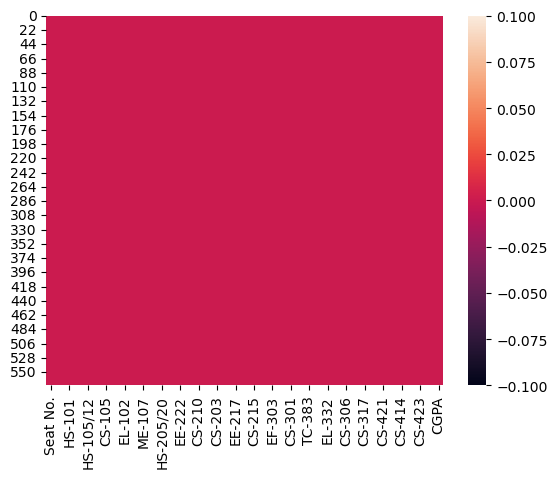

In [13]:
sns.heatmap(df.isna())

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Seat No.   571 non-null    int32  
 1   PH-121     571 non-null    int32  
 2   HS-101     571 non-null    int32  
 3   CY-105     571 non-null    float64
 4   HS-105/12  571 non-null    float64
 5   MT-111     571 non-null    float64
 6   CS-105     571 non-null    int32  
 7   CS-106     571 non-null    float64
 8   EL-102     571 non-null    float64
 9   EE-119     571 non-null    float64
 10  ME-107     571 non-null    float64
 11  CS-107     571 non-null    float64
 12  HS-205/20  571 non-null    float64
 13  MT-222     571 non-null    float64
 14  EE-222     571 non-null    float64
 15  MT-224     571 non-null    float64
 16  CS-210     571 non-null    float64
 17  CS-211     571 non-null    float64
 18  CS-203     571 non-null    float64
 19  CS-214     571 non-null    float64
 20  EE-217    

In [15]:
df.nunique().to_frame("NO. of unique values")

,NO. of unique values
Seat No.,571
PH-121,13
HS-101,12
CY-105,14
HS-105/12,14
MT-111,14
CS-105,11
CS-106,14
EL-102,14
EE-119,13


In [16]:
df.describe()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
count,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,...,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000
mean,285.000000,3.781086,5.071804,3.826709,4.981413,4.624379,2.838879,4.569217,4.642450,4.388163,...,4.947031,5.392604,4.517125,5.840431,5.430605,3.523747,4.484602,4.787266,5.187323,2.954888
std,164.977776,3.046895,2.785317,2.341409,2.601532,2.452645,2.696709,2.414301,2.542731,2.286263,...,3.099689,2.520443,2.434526,2.659162,4.154111,2.379334,2.293508,2.546619,3.672596,0.620552
min,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.800000
25%,142.500000,2.000000,3.000000,2.000000,3.000000,3.000000,0.000000,3.000000,3.000000,2.500000,...,2.000000,3.000000,3.000000,4.000000,2.000000,2.000000,3.000000,3.000000,2.000000,2.538000
50%,285.000000,3.000000,5.000000,2.921191,4.264448,4.000000,2.000000,4.000000,4.000000,3.921191,...,4.299475,5.000000,3.663748,5.595447,4.000000,2.693520,4.000000,4.211909,4.000000,3.029000
75%,427.500000,6.000000,7.000000,5.000000,7.000000,6.000000,4.000000,6.000000,6.000000,6.000000,...,7.000000,7.000000,6.000000,8.000000,7.000000,4.000000,5.000000,6.000000,6.000000,3.451000
max,570.000000,12.000000,11.000000,13.000000,13.000000,13.000000,10.000000,13.000000,13.000000,12.000000,...,14.000000,12.000000,11.000000,13.000000,14.000000,13.000000,12.000000,12.000000,13.000000,3.985000


1. There are no Missing values present
2. data distribution looking like good

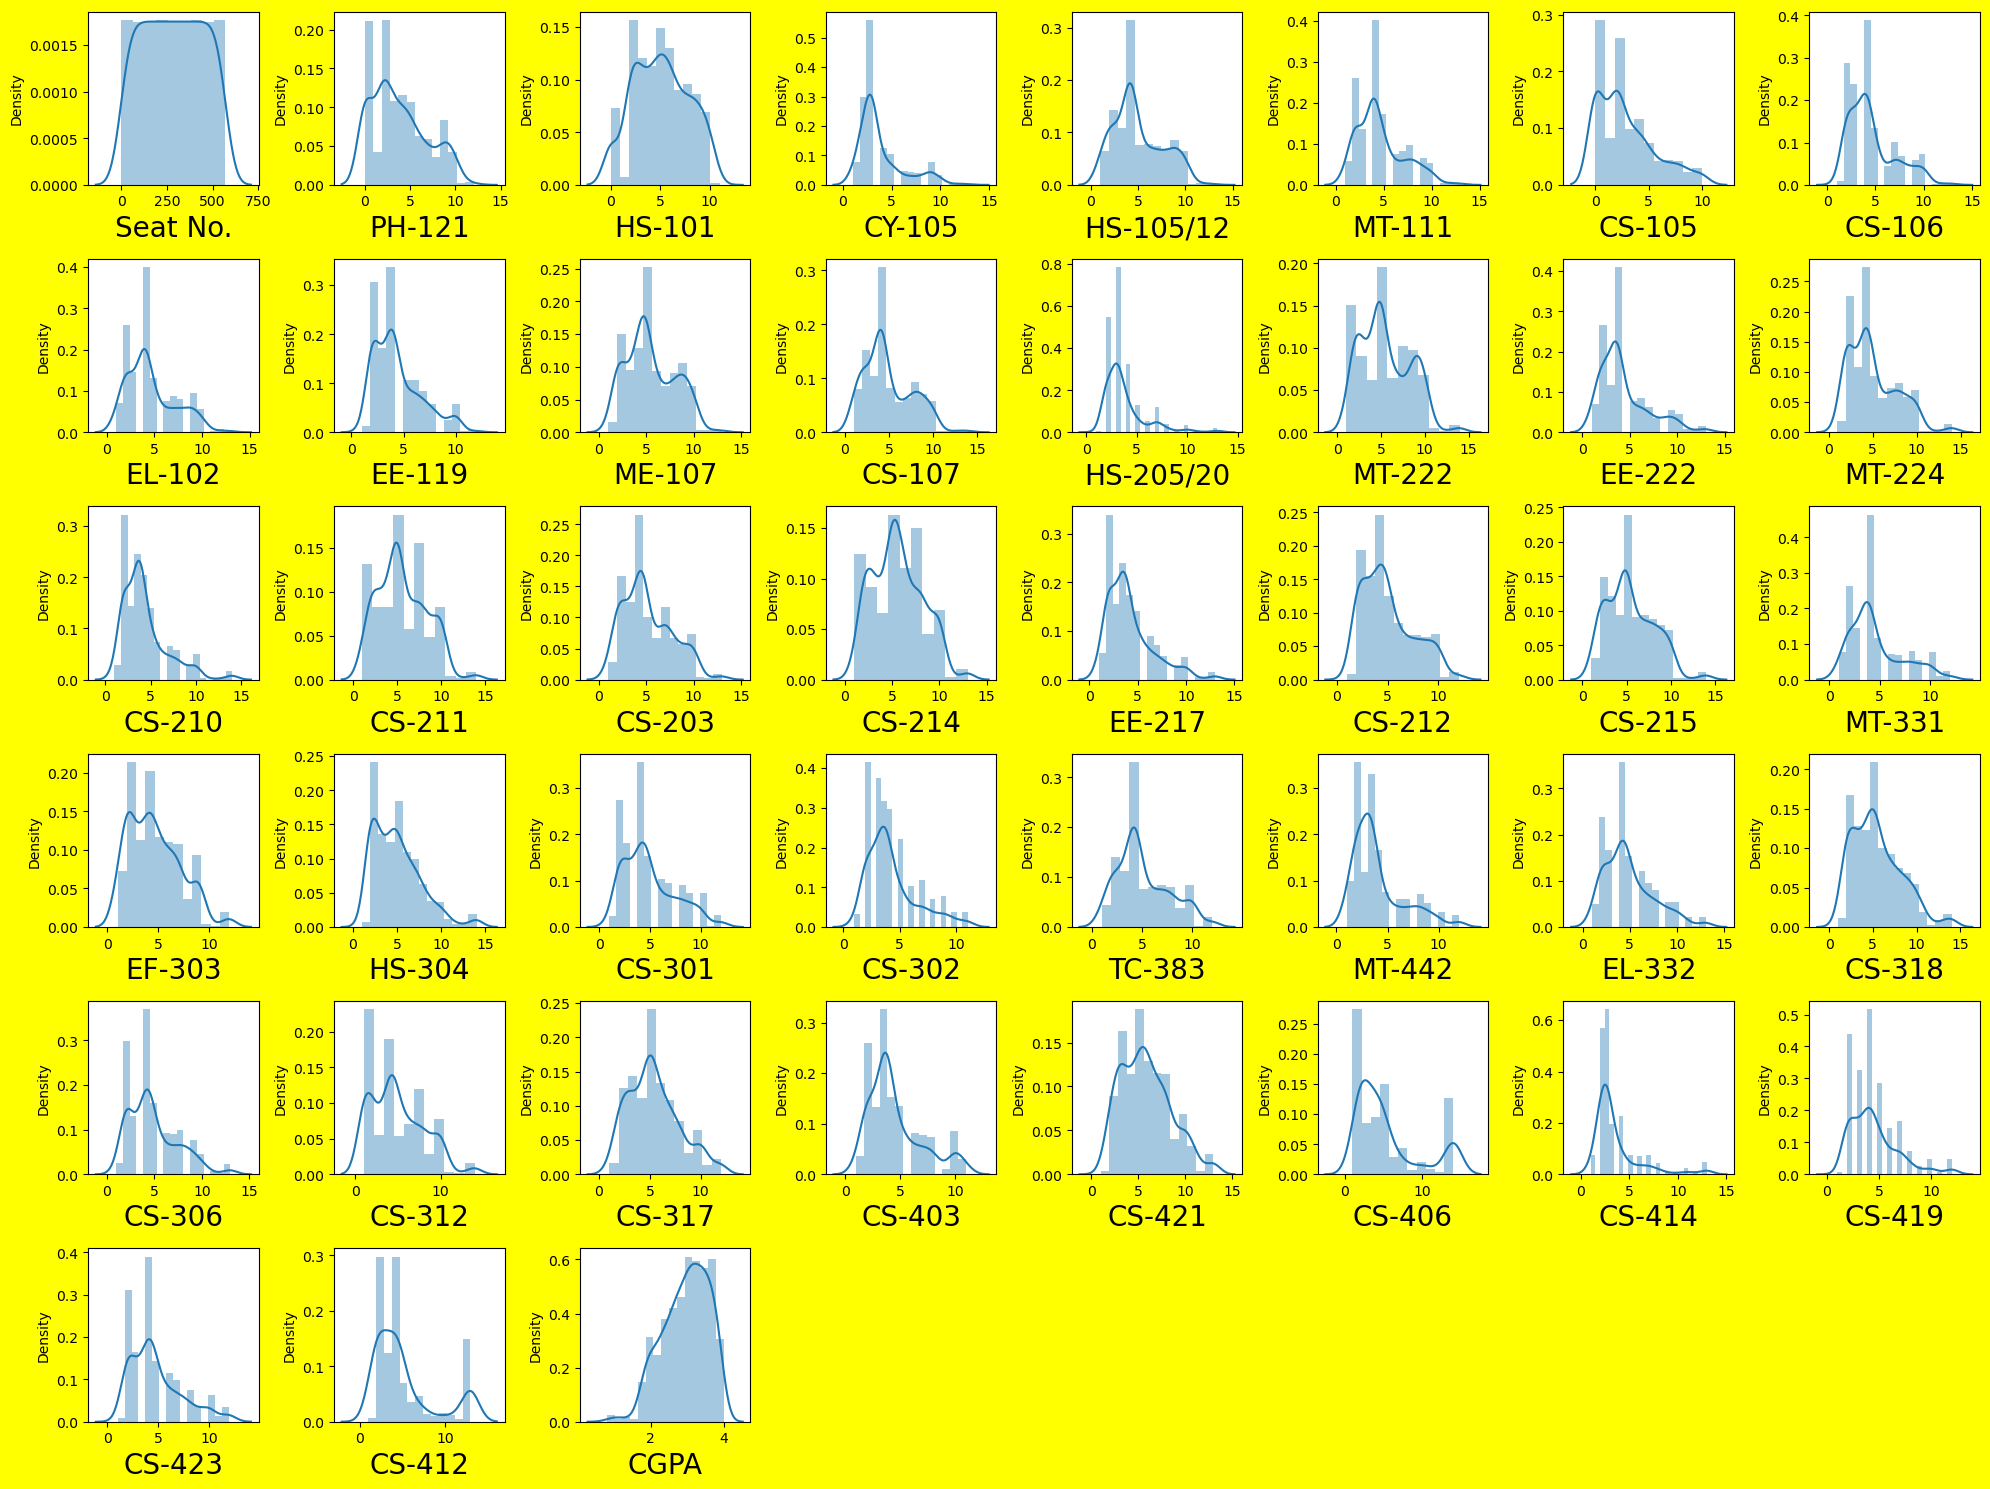

In [17]:
plt.figure(figsize=(20,15), facecolor='yellow')
plotnumber = 1

for column in df:
    if plotnumber <= 43:
        ax = plt.subplot(6,8,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize=20)
        
    plotnumber += 1
plt.tight_layout()

In [18]:
x = df.drop(columns=['CGPA'])
y = df.CGPA

In [19]:
x.head()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-306,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412
0,0,5,10,8.000000,6.0,8.000000,10,9.0,8.000000,5.000000,...,6.0,8.0,8.0,8.000000,8.0,2.000000,2.69352,8.000000,3.0,2.000000
1,1,0,9,10.000000,9.0,5.000000,6,9.0,3.998249,10.000000,...,9.0,10.0,9.0,6.000000,9.0,2.000000,5.00000,6.000000,6.0,3.000000
2,2,0,3,2.921191,5.0,4.000000,0,5.0,4.000000,2.000000,...,2.0,3.0,3.0,3.663748,6.0,4.770578,2.69352,4.084063,2.0,4.570928
3,3,9,7,10.000000,9.0,9.000000,2,10.0,8.000000,9.000000,...,8.0,10.0,6.0,10.000000,8.0,5.000000,3.00000,7.000000,7.0,7.000000
4,4,2,2,2.000000,4.0,3.935201,0,2.0,4.000000,3.921191,...,2.0,5.0,4.0,4.000000,5.0,2.000000,2.69352,2.000000,2.0,4.570928


In [20]:
y.head()

0    2.205
1    2.008
2    3.608
3    1.906
4    3.448
Name: CGPA, dtype: float64

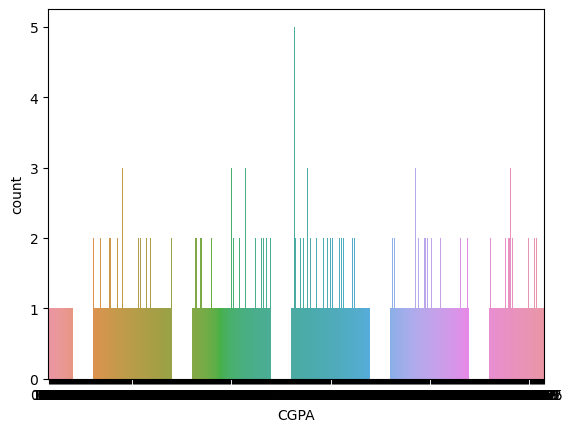

In [21]:
sns.countplot(x='CGPA', data=df)
plt.show()

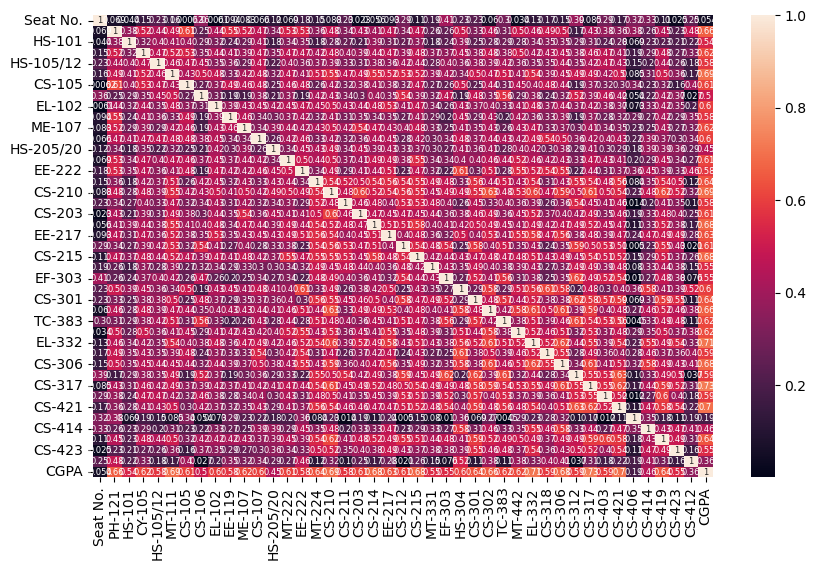

In [22]:
df_corr = df.corr().abs()  ## This code will get the coefficient of one variable vs all other variable (relationship)

plt.figure(figsize=(10,6))
sns.heatmap(df_corr, annot = True, annot_kws = {'size':6})      #annot =True means Number printed in Box
                                                                #annot_kws = {'size':6} means font size of number 
plt.show()

In [23]:
df.skew()

Seat No.     0.000000
PH-121       0.549104
HS-101       0.053303
CY-105       1.473512
HS-105/12    0.531843
MT-111       0.845485
CS-105       0.930769
CS-106       1.027281
EL-102       0.792965
EE-119       0.978535
ME-107       0.376561
CS-107       0.642404
HS-205/20    2.061952
MT-222       0.454716
EE-222       1.229881
MT-224       0.842307
CS-210       1.503253
CS-211       0.406504
CS-203       0.599166
CS-214       0.342896
EE-217       1.323035
CS-212       0.707046
CS-215       0.528917
MT-331       0.972962
EF-303       0.623758
HS-304       1.016720
CS-301       0.779321
CS-302       1.210812
TC-383       0.649518
MT-442       1.336636
EL-332       0.911062
CS-318       0.759286
CS-306       0.900651
CS-312       0.631036
CS-317       0.573924
CS-403       1.055034
CS-421       0.550648
CS-406       1.196299
CS-414       2.333252
CS-419       1.228464
CS-423       0.996976
CS-412       1.246339
CGPA        -0.497203
dtype: float64

### as per this, no skewness are present.

# Model Building

In [24]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [25]:
x_scaled

array([[-1.7290201 ,  0.40040198,  1.77089951, ...,  1.53410419,
        -0.70243444, -0.86862737],
       [-1.72295336, -1.24205154,  1.4115592 , ...,  0.6613131 ,
         0.47663085, -0.5961017 ],
       [-1.71688662, -1.24205154, -0.74448263, ..., -0.17479325,
        -1.09545621, -0.16798343],
       ...,
       [ 1.71688662, -0.25657943, -1.82250355, ..., -0.21147799,
        -1.09545621, -0.86862737],
       [ 1.72295336, -1.24205154, -0.38514232, ..., -0.64787354,
         0.08360908,  0.22147533],
       [ 1.7290201 ,  0.72889268,  1.4115592 , ..., -0.21147799,
         1.65569614,  0.76652668]])

## train_test_split

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled,y, test_size=0.30, random_state=320)

In [27]:
y_train.head()

552    2.406
485    3.303
6      2.957
447    1.882
71     2.805
Name: CGPA, dtype: float64

In [28]:
from sklearn.linear_model import LinearRegression

LR = LinearRegression()
LR.fit(x_train, y_train)

LinearRegression()

In [30]:
df.head()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,0,5,10,8.000000,6.0,8.000000,10,9.0,8.000000,5.000000,...,8.0,8.0,8.000000,8.0,2.000000,2.69352,8.000000,3.0,2.000000,2.205
1,1,0,9,10.000000,9.0,5.000000,6,9.0,3.998249,10.000000,...,10.0,9.0,6.000000,9.0,2.000000,5.00000,6.000000,6.0,3.000000,2.008
2,2,0,3,2.921191,5.0,4.000000,0,5.0,4.000000,2.000000,...,3.0,3.0,3.663748,6.0,4.770578,2.69352,4.084063,2.0,4.570928,3.608
3,3,9,7,10.000000,9.0,9.000000,2,10.0,8.000000,9.000000,...,10.0,6.0,10.000000,8.0,5.000000,3.00000,7.000000,7.0,7.000000,1.906
4,4,2,2,2.000000,4.0,3.935201,0,2.0,4.000000,3.921191,...,5.0,4.0,4.000000,5.0,2.000000,2.69352,2.000000,2.0,4.570928,3.448


In [31]:
# since we have already fit scaler, you can transform the data

print('CGPA SCORE : ', LR.predict(scaler.transform ([[0,5,10,8.0,6.0,8.0,10,9.0,8.0,
                                                      5.0,8.0,8.0,4.0,9.0,2.0,5.0,7.0,
                                                      10.0,10.0,9.0,3.570928,9.0,8.0,6.0,
                                                      7.0,7.0,3.0,6.0,7.0,4.0,6.0,8.0,
                                                     6.0,8.0,8.0,8.0,8.0,2.0,2.69352,8.0,
                                                      3.0,2.0]])))


CGPA SCORE :  [2.09900117]


In [32]:
LR.score(x_train, y_train)

0.9286369292672626

In [33]:
LR.score(x_test, y_test)

0.8861582345412712

In [34]:
x_test[1]

array([ 0.88574363,  0.72889268,  0.33353829, -0.3870798 , -1.14702702,
        0.15328383,  0.43094708,  1.00770953,  0.53436259, -0.60770782,
       -0.18286903,  1.53663484, -0.35188063,  1.25139589, -0.50882959,
        0.72977196, -0.12931171,  0.51661863, -0.05592863,  1.6903571 ,
       -0.4956512 , -0.78987981,  0.22405686, -0.29977042, -1.04510774,
        0.75404377, -0.35332977, -0.11297341, -0.42433835, -0.39333121,
        0.04763331,  0.90840068,  0.45343852, -0.95158421, -0.95011137,
       -0.3508386 ,  0.06005981, -0.58562149,  1.46230063, -1.08426908,
       -0.30941268, -0.5961017 ])

In [35]:
y_pred = LR. predict(x_test)

In [36]:
y_pred

array([2.03319635, 2.83355589, 3.27101732, 3.45839503, 2.97002766,
       3.34069656, 3.54386087, 3.65189709, 2.17467908, 3.40096757,
       3.78007609, 2.48466462, 2.89896163, 3.04374597, 3.55209555,
       2.06220114, 3.50487025, 3.37703171, 0.87365377, 3.30756552,
       3.62769391, 3.20296498, 2.86245541, 2.35270319, 2.11066982,
       3.59739651, 1.93174586, 2.72457608, 2.51941258, 3.11501526,
       2.86209759, 2.91455866, 2.57328471, 2.09315856, 1.81098469,
       2.54642106, 3.06323865, 3.22042571, 2.23787254, 3.65804595,
       3.12657469, 1.57646977, 3.42614849, 3.32035937, 3.03171864,
       3.61612349, 3.25226289, 3.49830831, 2.74469022, 3.24109142,
       3.30315296, 2.5626121 , 3.3316963 , 2.5997619 , 3.41775915,
       3.23295926, 2.90107089, 3.04795546, 3.13323471, 3.61918848,
       3.5887478 , 2.64975408, 3.36058368, 2.84550026, 2.61578502,
       2.80628294, 2.30723007, 3.4417685 , 3.24158816, 2.94143574,
       3.4339679 , 2.659045  , 3.77168094, 3.55318686, 3.36784

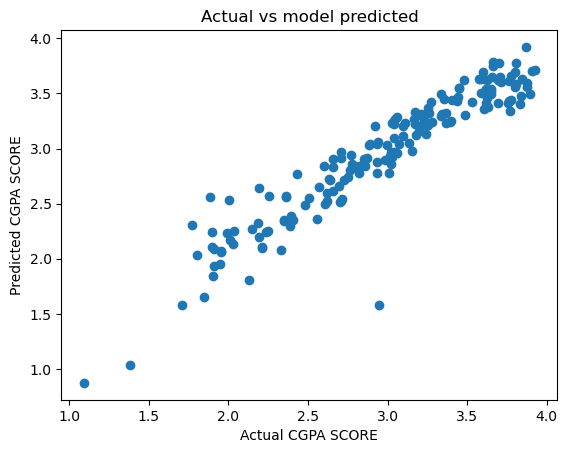

In [37]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual CGPA SCORE')
plt.ylabel('Predicted CGPA SCORE')
plt.title('Actual vs model predicted')
plt.show()

### NOW WE CAN SEE LINEAR SCATTER PLOT OF CGPA ACTUAL AND PREDICTED DATA SET OR VALUES 

In [38]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [39]:
y_pred = LR.predict(x_test)

In [40]:
mean_absolute_error(y_test, y_pred)

0.14718947480990777

In [41]:
mean_squared_error(y_test, y_pred)

0.04387513542219237

In [42]:
np.sqrt(mean_squared_error(y_test, y_pred))

0.20946392391577212

#### FOR MORE ACCURATE RESULT WE CAN DROP SOME UNWANTED COLUMNS AND MAKE PROJECT WITH ACCURATE RESULT. 

In [44]:
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

In [46]:
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

svr=SVR()

svr.fit(x_train,y_train)

ypredtrain=svr.predict(x_train)
ypredtest=svr.predict(x_test)

print(r2_score(y_train,ypredtrain))
print(r2_score(y_test,ypredtest))
print(cross_val_score(svr,x,y,cv=5,).mean())

0.9837816436535917
0.948453050505738
0.7035190933054929


In [47]:
# using RandomForestRegressor model
rf = RandomForestRegressor(random_state=42)

rf.fit(x_train,y_train)

ypredtrain2 = rf.predict(x_train)
ypredtest2 = rf.predict(x_test)

print(r2_score(y_train,ypredtrain2))
print(r2_score(y_test,ypredtest2))
print(cross_val_score(rf,x,y,cv=5,).mean())


# hyperparameter tunning
from sklearn.model_selection import GridSearchCV

estimator = RandomForestRegressor(random_state=42)

param_grid = {'n_estimators':[20,30,45,70,90,120,150]}

grid=GridSearchCV(estimator,param_grid,scoring="r2",cv=5)

grid.fit(x_train,y_train)

print(grid.best_params_)



# model after tunning parameters
rf = RandomForestRegressor(random_state=42,n_estimators=120)
rf.fit(x_train,y_train)
ypredtrain2 = rf.predict(x_train)
ypredtest2 = rf.predict(x_test)

print(r2_score(y_train,ypredtrain2))
print(r2_score(y_test,ypredtest2))
print(cross_val_score(rf,x,y,cv=5,).mean())

0.9887631040951116
0.9105923485513916
0.9242152322293853
{'n_estimators': 120}
0.9890530457276874
0.9107864293132863
0.9250503275105963


In [49]:
# use GradientBoostingRegressor model
GB=GradientBoostingRegressor()
GB.fit(x_train,y_train)

ypredtrain3=GB.predict(x_train)
ypredtest3=GB.predict(x_test)

print(r2_score(y_train,ypredtrain3))
print(r2_score(y_test,ypredtest3))
print(cross_val_score(GB,x,y,cv=5,).mean())


# hyperparameter tunning
from sklearn.model_selection import GridSearchCV
estimator=GradientBoostingRegressor()
param_grid={'n_estimators':[10,15,19,20,21,50],'learning_rate':[0.1,0.19,0.2,0.21,0.8,1]}

grid=GridSearchCV(estimator,param_grid,scoring="r2",cv=5)
grid.fit(x_train,y_train)

print(grid.best_params_)


# model after tunning parameters
GB = GradientBoostingRegressor(n_estimators=19,learning_rate=0.2)
GB.fit(x_train,y_train)
ypredtrain3=GB.predict(x_train)
ypredtest3=GB.predict(x_test)

print(r2_score(y_train,ypredtrain3))
print(r2_score(y_test,ypredtest3))
print(cross_val_score(GB,x,y,cv=5,).mean())

0.9966109745433968
0.9520105505520193
0.9528197419022127
{'learning_rate': 0.2, 'n_estimators': 50}
0.9826267629804741
0.9333213898129703
0.9327706269496356


In [50]:
# use XGBRegressor model
final = XGBRegressor()
final.fit(x_train,y_train)

ypredtrain4 =final.predict(x_train)
ypredtest4=final.predict(x_test)

print(r2_score(y_train,ypredtrain4))
print(r2_score(y_test,ypredtest4))
print(cross_val_score(final,x,y,cv=5,).mean())


# hyperparameter tunning
from sklearn.model_selection import GridSearchCV
estimator = XGBRegressor()
param_grid = {'n_estimators':[10,15,20,40,50],'max_depth':[3,4,5],'gamma':[0,0.15,0.3,0.5,1]}
grid = GridSearchCV(estimator,param_grid,scoring="r2",cv=5)
grid.fit(x_train,y_train)
print(grid.best_params_)


# model after tunning parameters
final = XGBRegressor(n_estimators=15,max_depth=3,gamma=0)
final.fit(x_train,y_train)

ypredtrain4 = final.predict(x_train)
ypredtest4 = final.predict(x_test)

print(r2_score(y_train,ypredtrain4))
print(r2_score(y_test,ypredtest4))
print(cross_val_score(final,x,y,cv=5,).mean())

0.999998600739186
0.9197084353664776
0.9206347926091638
{'gamma': 0, 'max_depth': 4, 'n_estimators': 50}
0.9837142198499113
0.9367508802112494
0.9327599291880603


In [51]:
from pickle import dump
dump(final, open('StudentGrades.pkl', 'wb'))

In [52]:
import pickle
loaded_model = pickle.load(open('StudentGrades.pkl', 'rb'))
result = loaded_model.score(x_test, y_test)
print(result*100)

93.67508802112494


In [53]:
conclusion = pd.DataFrame([loaded_model.predict(x_test)[:], y_test[:]], index = ['Predicted', 'Original'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,162,163,164,165,166,167,168,169,170,171
Predicted,2.035289,2.79161,3.332322,3.569843,3.17748,3.470643,3.616789,3.698825,2.34675,3.737078,...,3.209024,2.290356,3.41433,3.126455,1.868971,3.303905,2.079764,3.556709,3.749468,2.534173
Original,1.804000,2.78400,3.168000,3.623000,3.02300,3.769000,3.647000,3.656000,2.00800,3.831000,...,3.339000,2.146000,3.33400,3.156000,2.035000,3.174000,1.845000,3.651000,3.925000,2.212000


## BY USING XGBRegressor MODEL WE GET BEST PREDICTED DATA.